In [1]:
import pandas as pd
import numpy as np
from scipy.stats import binom_test
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
file_loc = '/Users/gzcheng/Desktop/Udacity/ABTesting/homepage-experiment-data.csv'

In [27]:
df = pd.read_csv(file_loc, index_col='Day')

,Control Cookies,Control Downloads,Control Licenses,Experiment Cookies,Experiment Downloads,Experiment Licenses
Day,,,,,,
12,1529,228,23,1567,267,34
3,1457,240,1,1515,274,1
11,1478,240,35,1555,279,36
9,1478,223,30,1553,298,38
29,1781,254,33,1728,290,41


In [39]:
df.sample(5)

,Control Cookies,Control Downloads,Control Licenses,Experiment Cookies,Experiment Downloads,Experiment Licenses
Day,,,,,,
21,1602,271,38,1588,256,44
8,1798,331,12,1787,326,20
1,1764,246,1,1850,339,3
11,1478,240,35,1555,279,36
3,1457,240,1,1515,274,1


In [4]:
df_ctr, df_exp = pd.DataFrame(), pd.DataFrame()
df_ctr[['cookies','downloads','license']] = df[['Control Cookies','Control Downloads','Control Licenses']]
df_exp[['cookies','downloads','license']] = df[['Experiment Cookies','Experiment Downloads','Experiment Licenses']]

In [5]:
df_ctr['cookies'].iloc[21]

1743

In [6]:
df_ctr['download_rate'] = df_ctr['downloads']/df_ctr['cookies']
df_exp['download_rate'] = df_exp['downloads']/df_exp['cookies']
df_ctr['license_rate'] = df_ctr['license']/df_ctr['cookies'].iloc[21]
df_exp['license_rate'] = df_exp['license']/df_exp['cookies'].iloc[21]
df_ctr['type'] = 'ctr'
df_exp['type'] = 'exp'

In [7]:
p_cookies = 3250/2

In [8]:
mu_ctr_cookies, sig_ctr_cookies, n_ctr_cookies = np.mean(df_ctr.cookies), np.std(df_ctr.cookies), df_ctr.shape[0]
mu_exp_cookies, sig_exp_cookies, n_exp_cookies = np.mean(df_exp.cookies), np.std(df_exp.cookies), df_exp.shape[0]

# check the invariant metrics

In [9]:
# dtr_exp = np.random.normal(loc=p_cookies, scale=sig_exp_cookies, size=n_exp_cookies)
# # Perform one-sample t-test
# _, pv_exp_cookies = stats.ttest_1samp(dtr_exp, mu_exp_cookies)
# pv_exp_cookies

In [10]:
n_control = df['Control Cookies'].sum()
n_experiment = df['Experiment Cookies'].sum()
n_obs = n_control + n_experiment

print("Total number of observation: ", n_obs)
print("Total number of control group: ", n_control)
print("Total number of experiment group: ", n_experiment)
# Compute a z-score and p-value
p = 0.5
sd = np.sqrt(p * (1-p) * n_obs)

z = (n_control - p * n_obs) / sd

print("z score: ",z)
print("p value: ", 2 * stats.norm.cdf(z))

Total number of observation:  94197
Total number of control group:  46851
Total number of experiment group:  47346
z score:  -1.6128228329131302
p value:  0.10678300401876312


# check the evaluation metrics

># download rate

> assuming the download rate is not increased. Therefore,
>
> null: $H_1 \leq H_0$
> 
> alternative: $H_1 > H_0$

> To do this, we need to find p-value. As the dataset is small we can use bootstraping

In [50]:
sample_diff = []
for i in range(10000):
    sample_0 = df_ctr.download_rate.sample(15)
    sample_1 = df_exp.download_rate.sample(15)
    sample_diff.append(sample_0.mean() - sample_1.mean())

In [51]:
mu, std = np.mean(sample_diff), np.std(sample_diff)
mu

-0.01953770394692793

In [52]:
std

0.002539421902230108

> setup the zero mean normal distribution

In [53]:
bino = np.random.normal(loc=0, scale = 1, size=len(sample_diff))

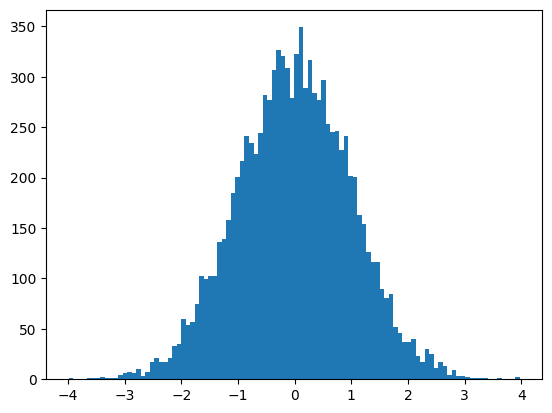

In [55]:
plt.hist(bino,bins=100);

> get the p-value

In [56]:
z_score = (mu-0)/std
z_score

-7.693760508944973

In [57]:
p_value = stats.norm.cdf(z_score)
p_value

7.143618532682473e-15

># purchase rate

In [40]:
df_ctr.head()

,cookies,downloads,license,download_rate,license_rate,type
Day,,,,,,
1,1764,246,1,0.139456,0.000574,ctr
2,1541,234,2,0.151849,0.001147,ctr
3,1457,240,1,0.164722,0.000574,ctr
4,1587,224,1,0.141147,0.000574,ctr
5,1606,253,2,0.157534,0.001147,ctr


In [41]:
df_exp.head()

,cookies,downloads,license,download_rate,license_rate,type
Day,,,,,,
1,1850,339,3,0.183243,0.001612,exp
2,1590,281,2,0.176730,0.001075,exp
3,1515,274,1,0.180858,0.000537,exp
4,1541,284,2,0.184296,0.001075,exp
5,1643,292,3,0.177724,0.001612,exp


In [42]:
sample_diff = []
for i in range(10000):
    sample_0 = df_ctr.license_rate.sample(15)
    sample_1 = df_exp.license_rate.sample(15)
    sample_diff.append(sample_0.mean() - sample_1.mean())
mu, std = np.mean(sample_diff), np.std(sample_diff)

In [43]:
bino = np.random.normal(loc=0, scale = 1, size=len(sample_diff))

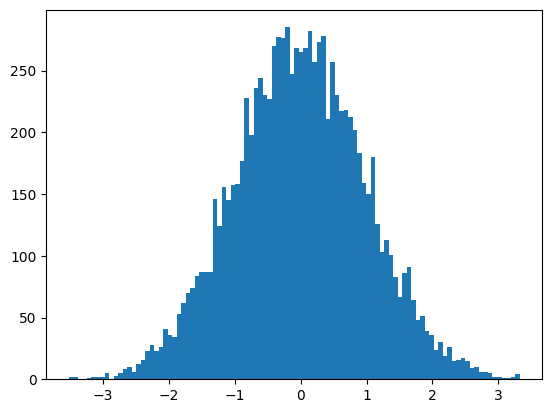

In [44]:
plt.hist(bino,bins=100);

In [45]:
z_score = (mu-0)/std
z_score

0.25998177945687645

In [46]:
mu

0.0005072972137263254

In [47]:
std

0.0019512798734823316

In [49]:
p_value = stats.norm.cdf(z_score)
1-p_value

0.39743891417534505